In [3]:
import pandas as pd
import pandas as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
pd.set_option("display.max_columns", None)

In [5]:
df_1 = pd.read_csv("A2 - MOSL Dataset required for PoC - OnFinance.xlsx - App Clicks Data.csv")

In [23]:
df_1

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
0,Client8,12/15/2023,8,145,0,0,0,0,0,5,0,0,0,0,0,0,0,0,47,0,28,3,0,0,15
1,Client46,12/15/2023,8,48,0,0,0,0,0,1,0,0,0,0,0,0,0,2,6,0,1,1,0,0,0
2,Client48,12/15/2023,5,42,0,0,0,0,0,4,0,0,0,0,0,0,0,0,7,0,17,0,0,0,0
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491
4,Client37,12/15/2023,8,559,0,0,0,0,0,3,0,0,0,0,0,0,0,76,5,0,318,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Client32,12/1/2023,9,1641,0,0,0,0,0,3,0,0,0,0,0,0,0,309,33,0,1199,28,0,0,2
591,Client30,12/1/2023,11,118,1,0,0,0,0,1,0,0,0,0,0,2,0,20,5,0,21,5,0,0,15
592,Client28,12/1/2023,10,126,0,0,0,1,0,3,0,0,0,0,0,0,0,11,14,0,26,16,0,0,10
593,Client19,12/1/2023,7,574,0,0,0,0,0,6,0,0,0,0,0,0,0,49,0,0,120,0,0,0,70


In [32]:
trade_data = pd.read_csv('A2 - MOSL Dataset required for PoC - OnFinance.xlsx - Trade Data - A2 - MOSL Dataset required for PoC - OnFinance.xlsx - Trade Data_updated.csv').drop("Unnamed: 13", axis = 1)

In [33]:
trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Client Code                  4547 non-null   object
 1   Date                         4547 non-null   object
 2   Company Name (Stock Symbol)  4547 non-null   object
 3   Quantity Bought              4547 non-null   object
 4   Quantity Sold                4547 non-null   object
 5   Price per Share              4547 non-null   object
 6   Brokerage Fees/Charges       4547 non-null   object
 7   Total Cost (Bought)          4547 non-null   object
 8   Total Revenue (Sold)         4547 non-null   object
 9   Transaction Type             4547 non-null   object
 10  Action                       4547 non-null   object
 11  Exchange                     4547 non-null   object
 12  Segment                      4547 non-null   object
dtypes: object(13)
memory usage: 461.9

In [44]:
df_1.sort_values("Client Code").query("`Client Code` == 'Client1'").drop(["Client Code", "Date"], axis = 1).corr()

,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
Distinct Screen Clicks,1.000000,0.729580,NaN,NaN,NaN,NaN,0.395283,0.605645,NaN,NaN,NaN,NaN,NaN,NaN,0.402077,0.648089,NaN,NaN,0.739254,0.686797,NaN,NaN,NaN
Total Clicks,0.729580,1.000000,NaN,NaN,NaN,NaN,0.542470,0.342739,NaN,NaN,NaN,NaN,NaN,NaN,0.541962,0.957802,NaN,NaN,0.959902,0.925625,NaN,NaN,NaN
Advisor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baskets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chatbot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flexi Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fund Transfer,0.395283,0.542470,NaN,NaN,NaN,NaN,1.000000,0.234290,NaN,NaN,NaN,NaN,NaN,NaN,0.051457,0.308007,NaN,NaN,0.711035,0.325755,NaN,NaN,NaN
Login,0.605645,0.342739,NaN,NaN,NaN,NaN,0.234290,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.118262,0.310869,NaN,NaN,0.403947,0.156368,NaN,NaN,NaN
Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MF Order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
test = df_1.sort_values("Client Code").query("`Client Code` == 'Client1'")

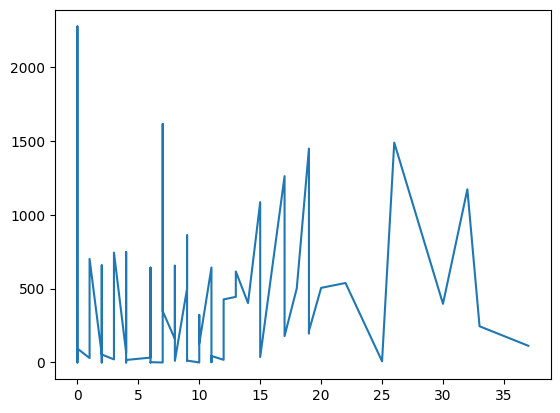

In [51]:
temp = df_1.sort_values(["Fund Transfer"])
plt.plot(temp["Fund Transfer"], temp["Reports"])

In [58]:
merged_df_a = pd.merge(df_1, trade_data, on=['Client Code', 'Date'], how='outer')

In [59]:
merged_df_a.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
0,Client8,12/15/2023,8.0,145.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,28.0,3.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Client46,12/15/2023,8.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Client48,12/15/2023,5.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Client31,12/15/2023,13.0,1659.0,3.0,223.0,0.0,0.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,343.0,0.0,0.0,53.0,88.0,0.0,0.0,491.0,HPL,11,11,234.35,0,2577.85,2577.85,TRADING,SELL,NSE,CASH
4,Client31,12/15/2023,13.0,1659.0,3.0,223.0,0.0,0.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,343.0,0.0,0.0,53.0,88.0,0.0,0.0,491.0,SASKEN,2,2,1352.975,0,2705.95,2705.95,TRADING,BUY,NSE,CASH


In [60]:
merged_df_a.isnull().sum()

Client Code                      0
Date                             0
Distinct Screen Clicks         403
Total Clicks                   403
Advisor                        403
Baskets                        403
Chatbot                        403
Flexi Loan                     403
Fund Transfer                  403
Login                          403
Market                         403
MF Order                       403
MF                             403
NCR                            403
News                           403
Options                        403
Other Products                 403
Place Order                    403
Portfolio                      403
Recommendation                 403
Reports                        403
Search                         403
Stock SIP                      403
Wallet                         403
Watchlist                      403
Company Name (Stock Symbol)    258
Quantity Bought                258
Quantity Sold                  258
Price per Share     

In [62]:
merged_df_b = pd.merge(df_1, trade_data, on=['Client Code', 'Date'], how='inner')

In [63]:
merged_df_b.isnull().sum()

Client Code                    0
Date                           0
Distinct Screen Clicks         0
Total Clicks                   0
Advisor                        0
Baskets                        0
Chatbot                        0
Flexi Loan                     0
Fund Transfer                  0
Login                          0
Market                         0
MF Order                       0
MF                             0
NCR                            0
News                           0
Options                        0
Other Products                 0
Place Order                    0
Portfolio                      0
Recommendation                 0
Reports                        0
Search                         0
Stock SIP                      0
Wallet                         0
Watchlist                      0
Company Name (Stock Symbol)    0
Quantity Bought                0
Quantity Sold                  0
Price per Share                0
Brokerage Fees/Charges         0
Total Cost

In [64]:
merged_df_b.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
0,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,HPL,11,11,234.35,0,2577.85,2577.85,TRADING,SELL,NSE,CASH
1,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,SASKEN,2,2,1352.975,0,2705.95,2705.95,TRADING,BUY,NSE,CASH
2,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,KRSNAA,4,4,719.6,0,2878.4,2878.4,TRADING,SELL,NSE,CASH
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,HPL,11,11,231.35,0,2544.85,2544.85,TRADING,BUY,NSE,CASH
4,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,NAZARA,3,3,865,0,2595,2595,TRADING,SELL,NSE,CASH


In [67]:
merged_df_b.shape, merged_df_a.shape

((4160, 36), (4821, 36))

In [68]:
merged_df_b.describe()

,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
count,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.00000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.000000,4160.0,4160.0,4160.000000
mean,9.562500,1323.020673,0.718750,15.390144,0.007692,0.0,3.606250,5.26899,0.381010,0.018029,0.742308,0.0,0.754327,0.191106,0.335817,238.386058,22.188221,0.0,463.293750,79.082692,0.0,0.0,182.025000
std,1.500961,796.863370,3.621319,61.845284,0.111552,0.0,7.076184,2.64407,1.592775,0.171024,6.698641,0.0,3.457603,0.804393,1.172321,158.565132,38.787271,0.0,400.466994,69.252474,0.0,0.0,244.935077
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,9.000000,709.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,105.000000,2.000000,0.0,194.000000,22.000000,0.0,0.0,0.000000
50%,9.000000,1265.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,214.000000,7.000000,0.0,397.000000,71.000000,0.0,0.0,51.000000
75%,10.000000,1890.000000,0.000000,0.000000,0.000000,0.0,4.000000,6.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,343.000000,28.000000,0.0,589.000000,108.000000,0.0,0.0,338.000000
max,15.000000,3398.000000,70.000000,456.000000,2.000000,0.0,33.000000,21.00000,16.000000,2.000000,81.000000,0.0,23.000000,12.000000,10.000000,889.000000,413.000000,0.0,2274.000000,390.000000,0.0,0.0,829.000000


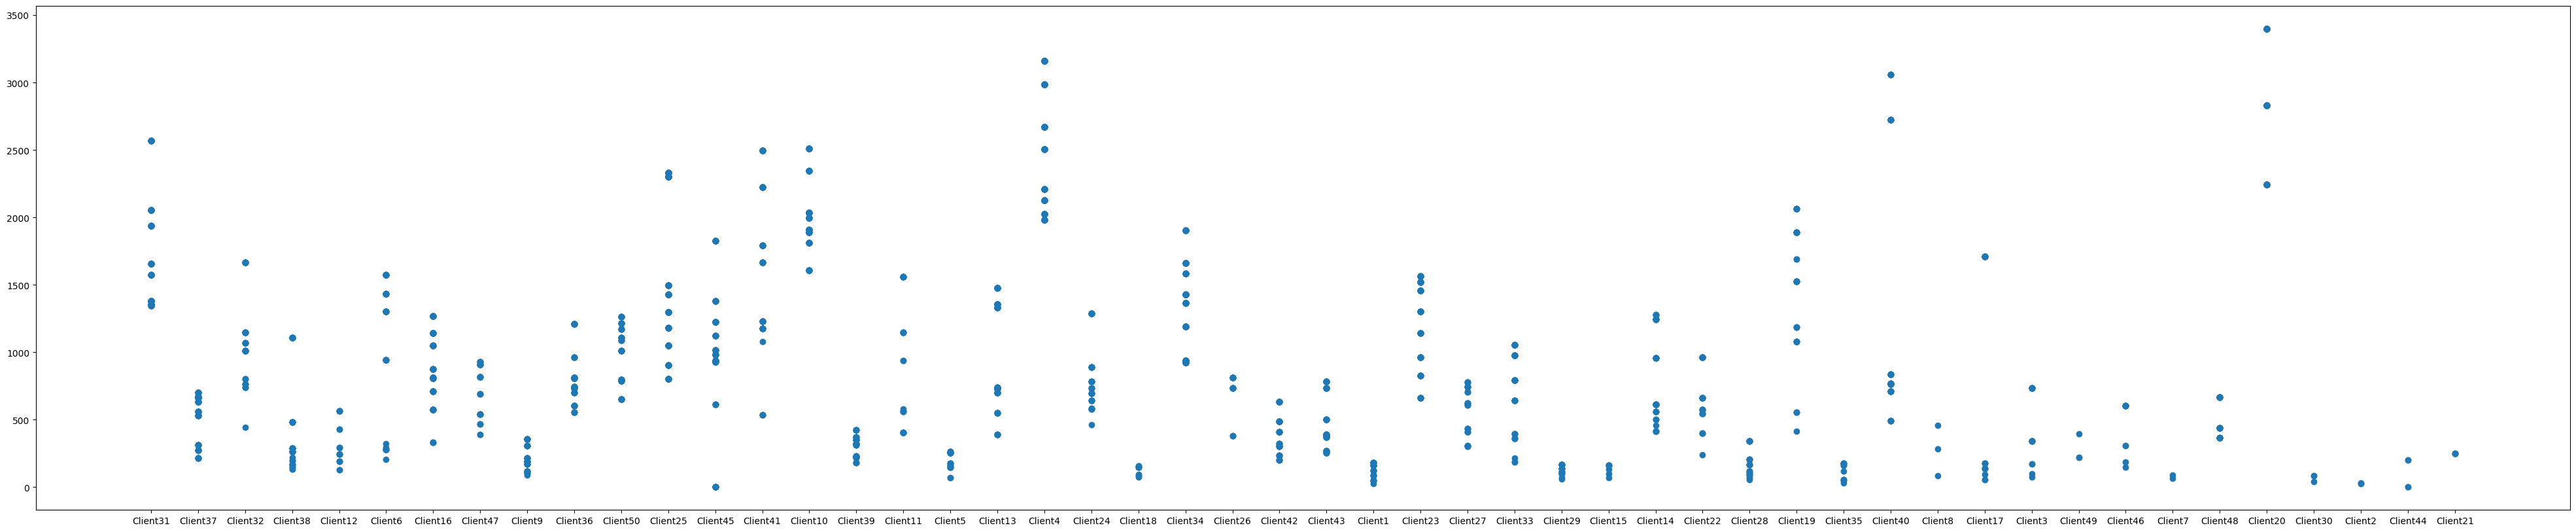

In [83]:
plt.figure(figsize=(50,10))
plt.scatter(merged_df_b['Client Code'], merged_df_b['Total Clicks'])

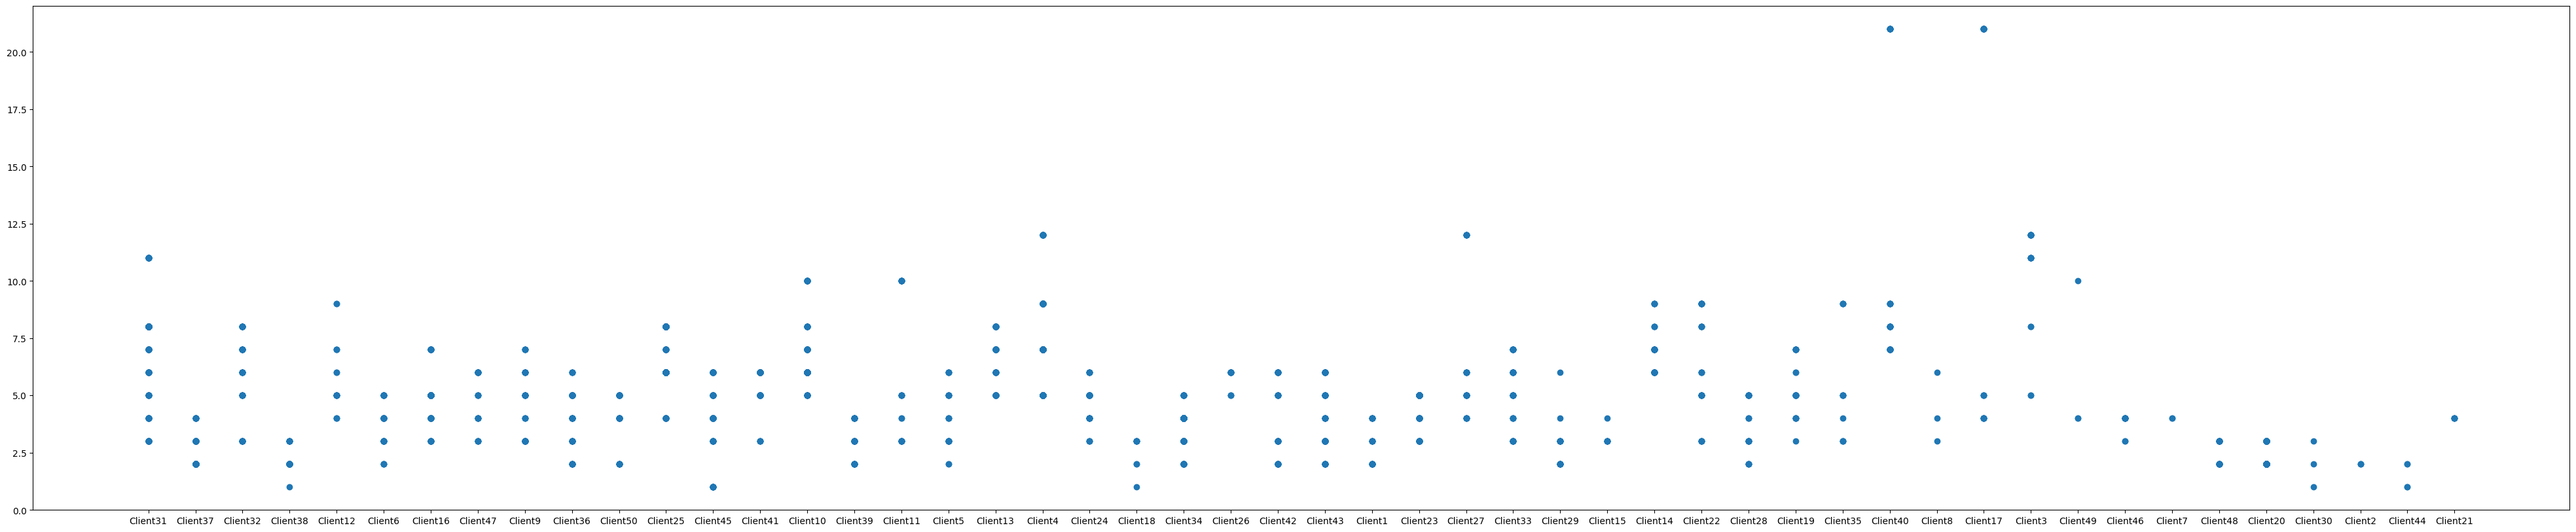

In [85]:
plt.figure(figsize=(50,10))
plt.scatter(merged_df_b['Client Code'], merged_df_b['Login'])

In [88]:
df_1.shape

(595, 25)

In [87]:
df_1.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
0,Client8,12/15/2023,8,145,0,0,0,0,0,5,0,0,0,0,0,0,0,0,47,0,28,3,0,0,15
1,Client46,12/15/2023,8,48,0,0,0,0,0,1,0,0,0,0,0,0,0,2,6,0,1,1,0,0,0
2,Client48,12/15/2023,5,42,0,0,0,0,0,4,0,0,0,0,0,0,0,0,7,0,17,0,0,0,0
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491
4,Client37,12/15/2023,8,559,0,0,0,0,0,3,0,0,0,0,0,0,0,76,5,0,318,36,0,0,0


In [91]:
aggregated_data = df_1.groupby(['Client Code', 'Date']).agg({
    'Total Clicks': 'sum',
}).reset_index()

In [92]:
aggregated_data

,Client Code,Date,Total Clicks
0,Client1,12/1/2023,131
1,Client1,12/11/2023,52
2,Client1,12/12/2023,48
3,Client1,12/13/2023,25
4,Client1,12/14/2023,91
...,...,...,...
583,Client9,12/2/2023,19
584,Client9,12/4/2023,218
585,Client9,12/5/2023,308
586,Client9,12/6/2023,172
